In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Questions to answer
-[*]Top 5 most popular artist
-[*]Top 5 loudest tracks
-[*]Artist with the most dancable song
-[*]Top 10 instrumental tracks
-[*]Multiple feature plots
-[*]Top 10 energetic tracks
-[*]Most commont durations
-[*]Top 10 tracks with most valence

In [46]:
sns.set_style("darkgrid")

In [53]:
#Loading the dataset
df_spotify= pd.read_csv('/Users/tess/Desktop/Sportify Dataset/spotify_data.csv')
df_spotify.drop("Unnamed: 0", axis=1, inplace=True)
df_spotify.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [55]:
#Data Cleaning
df_spotify.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [56]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [65]:
df_spotify.shape
#To check the statistical analysis of the data 
df_spotify.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


### Data Analysis

### Top 5 most popular artist

In [126]:
topFiveArtists= df_spotify.groupby("artist").count().sort_values(by="song_title", ascending= False)["song_title"][:5]
topFiveArtists

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: song_title, dtype: int64

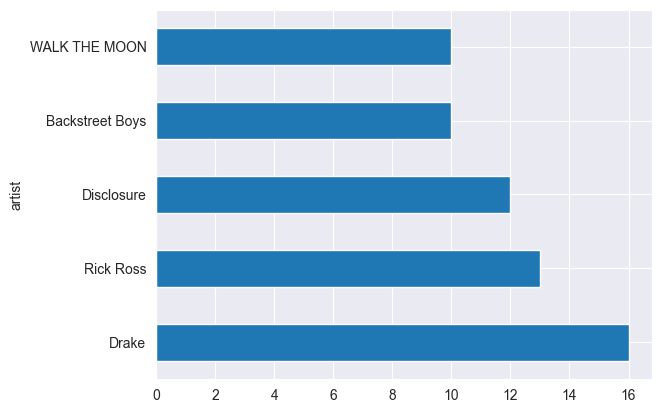

In [73]:
topFiveArtists.plot.barh()
plt.show()

### Top 5 loudest tracks

In [76]:
topFiveLoudestTracks= df_spotify[["loudness", "song_title"]].sort_values(by="loudness", ascending= True)[:5]
topFiveLoudestTracks

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


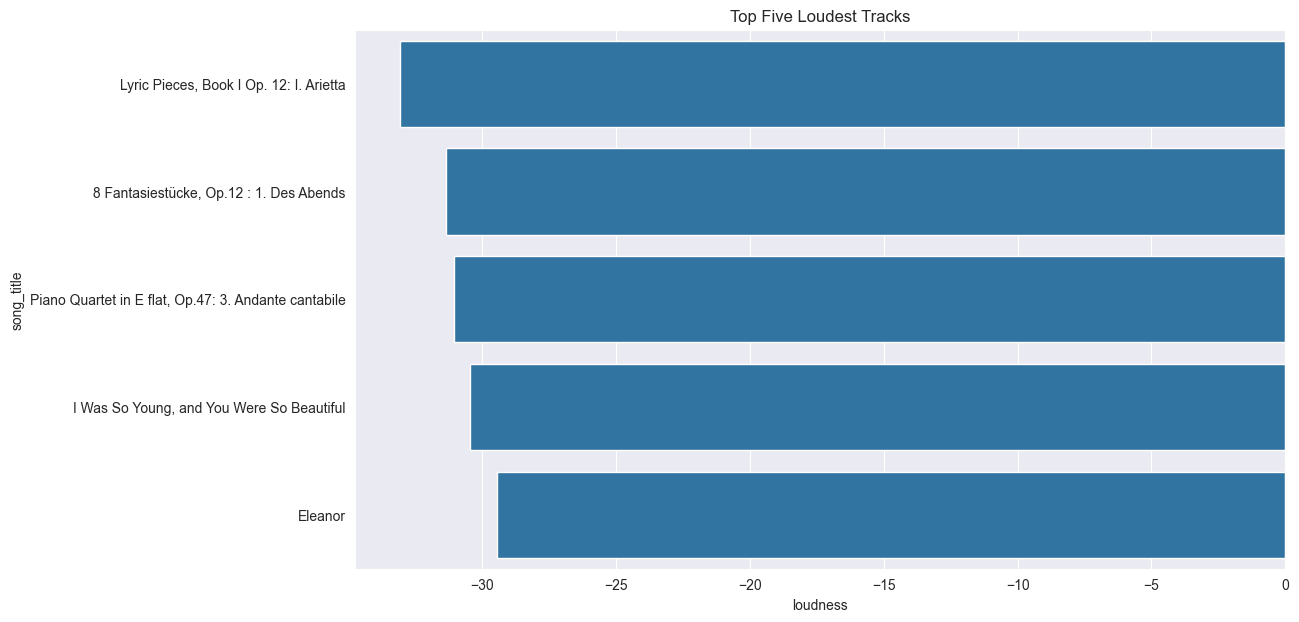

In [79]:
plt.figure(figsize= (12, 7))
sns.barplot(x="loudness", y="song_title", data=topFiveLoudestTracks)
plt.title("Top Five Loudest Tracks")
plt.show()


### Artist with the most dancable song

In [82]:
topFiveDancableArtist= df_spotify[["danceability", "song_title", "artist"]].sort_values(by="danceability", ascending= False)[:5]
topFiveDancableArtist

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


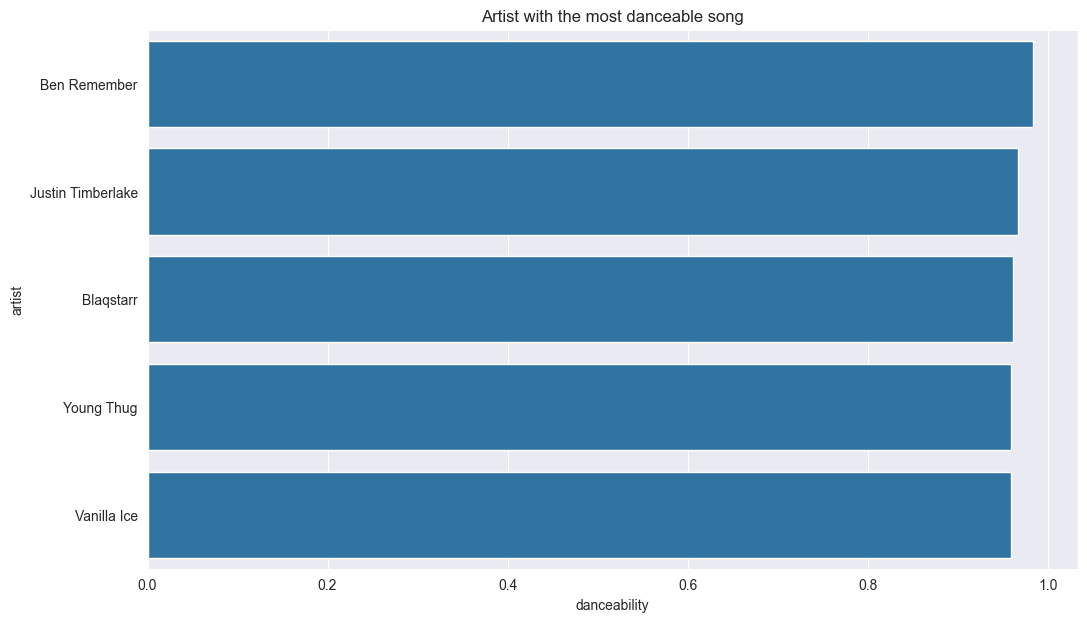

In [83]:
plt.figure(figsize=(12, 7))
sns.barplot(x= "danceability", y="artist", data=topFiveDancableArtist)
plt.title("Artist with the most danceable song")
plt.show()

### Top 5 instrumental tracks

In [93]:
topFiveInstrumentalTracks = df_spotify[["instrumentalness", "song_title","artist"]].sort_values(by="instrumentalness", ascending=False)[:5]
topFiveInstrumentalTracks

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje


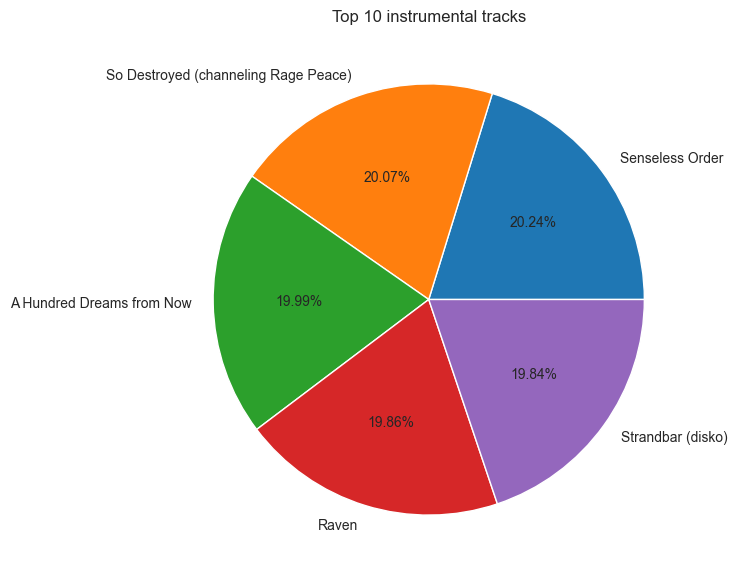

In [128]:
plt.figure(figsize=(12, 7))
#sns.barplot(x= "artist", y="song_title", data=topFiveInstrumentalTracks)
plt.title("Top 10 instrumental tracks")
plt.pie(x="instrumentalness", data=topFiveInstrumentalTracks, autopct= '%1.2f%%', labels=topFiveInstrumentalTracks.song_title)
plt.show()

### Multiple feature plots

In [100]:
featureColumns= ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]

In [ ]:
for feature in featureColumns:
    positiveData=df_spotify[df_spotify["target"]==1][feature]
    negativeData=df_spotify[df_spotify["target"]==0][feature]

    plt.figure(figsize=(12,7))
    
    sns.displot(positiveData, bins=30, label= "Positive", color="green")
    sns.displot(negativeData, bins=30, label= "Negative", color="red")
    
    plt.legend(loc="upper right")
    plt.title(f"Positive and Negative Histogram Plot for {feature}")

    plt.show()


### Top 10 energetic tracks

In [134]:
topFiveEnergeticTracks= df_spotify[["energy", "song_title"]].sort_values(by="energy", ascending= True)[:5]
topFiveEnergeticTracks


,energy,song_title
1594,0.0148,"Lyric Pieces, Book I Op. 12: I. Arietta"
1595,0.0156,"String Quartet No. 4 in C Major, D. 46: II. An..."
1537,0.0161,Blue in Green
1598,0.0230,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1596,0.0288,"8 Fantasiestücke, Op.12 : 1. Des Abends"


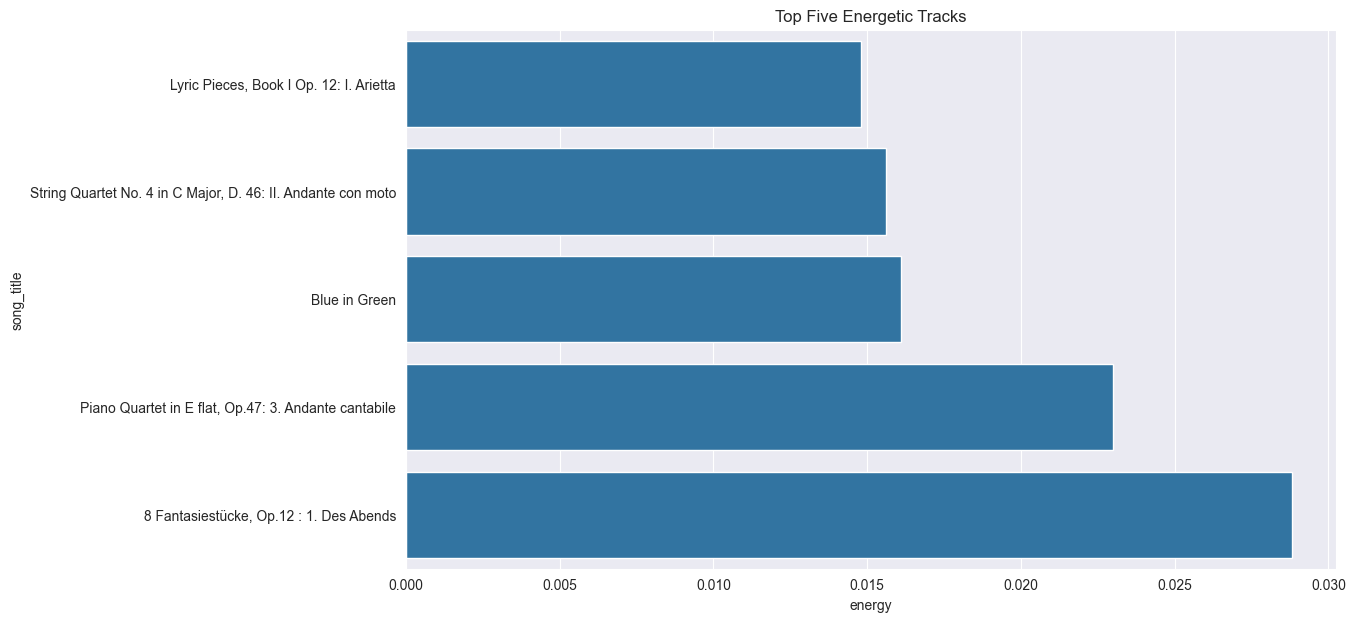

In [135]:
plt.figure(figsize= (12, 7))
sns.barplot(x="energy", y="song_title", data=topFiveEnergeticTracks)
plt.title("Top Five Energetic Tracks")
plt.show()


### Most commont durations

In [119]:
mostCommonDurations = df_spotify['duration_ms'].value_counts()[:5]
mostCommonDurations

duration_ms
192000    5
243493    3
206013    3
228467    3
240000    3
Name: count, dtype: int64

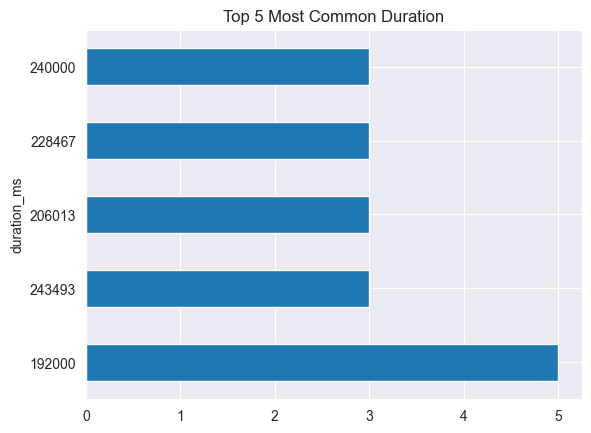

In [123]:
mostCommonDurations.plot.barh()
plt.title("Top 5 Most Common Duration")
plt.show()



### Top 10 tracks with most valence

In [132]:
topTenValenceTracks= df_spotify[["valence", "song_title"]].sort_values(by="valence", ascending= True)[:10]
topTenValenceTracks


,valence,song_title
1439,0.0348,Polaris
57,0.0359,L$D
813,0.0373,Damn Son Where'd You Find This? (feat. Kelly H...
811,0.0373,"Damn Son, Where'd You Find This? - Future of T..."
1876,0.0378,"Nocturne No.1 In B Flat Minor, Op.9 No.1"
1950,0.0384,"My Heart Will Go On (Love Theme from ""Titanic"")"
734,0.0390,Warm In The Winter
488,0.0397,Van Vogue
1308,0.0399,Spiteful Nature
1499,0.0440,Eyes Closed


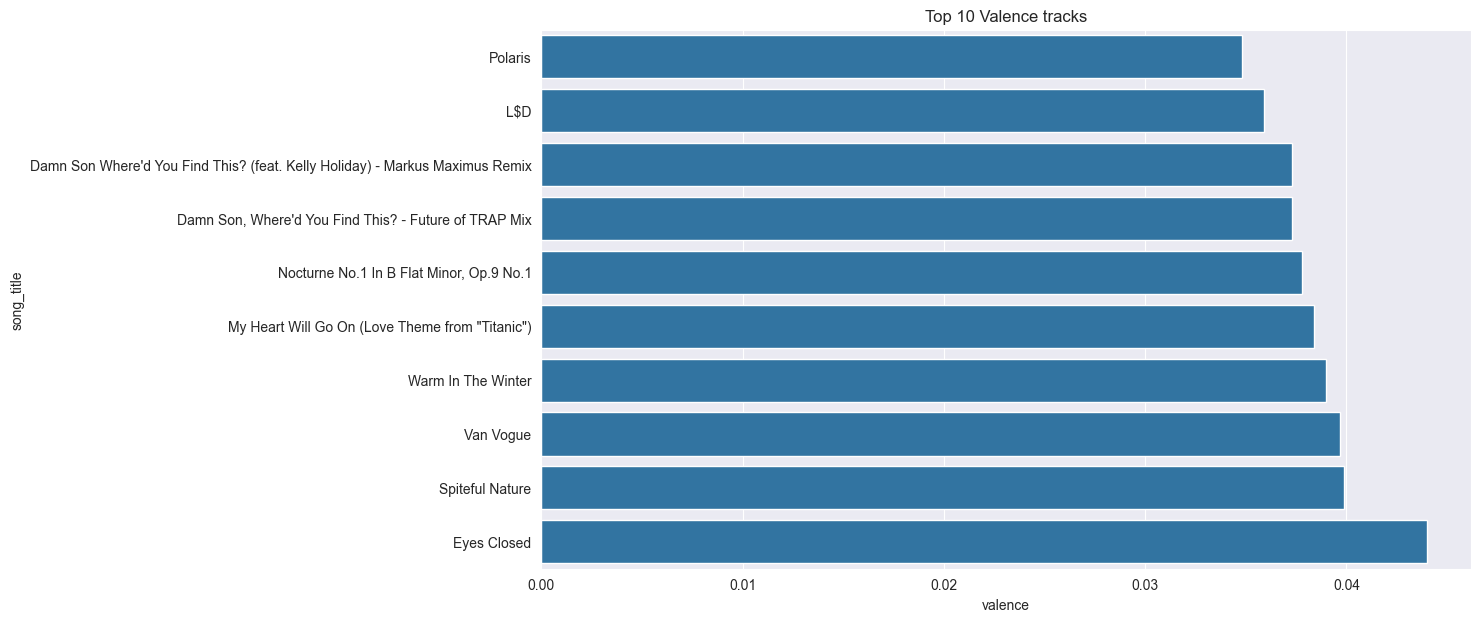

In [137]:


plt.figure(figsize= (12, 7))
sns.barplot(x="valence", y="song_title", data=topTenValenceTracks)
plt.title("Top 10 Valence tracks")
plt.show()
